In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [3]:
%config Completer.use_jedi = False  # 자동완성 속도 증가

In [9]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(19.6, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [10]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [11]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                   np.ones((num_samples_per_class, 1), dtype='float32')))

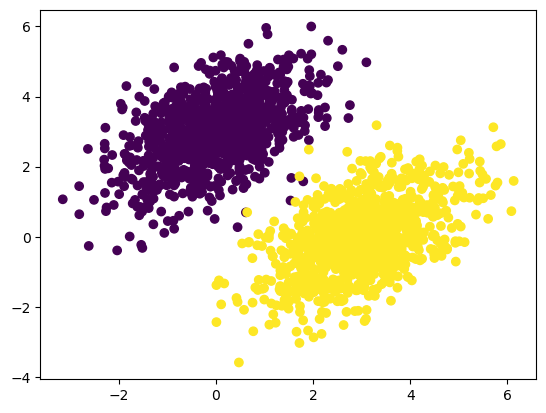

In [19]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [14]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [15]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [16]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [17]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [18]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'{step}번째 스텝의 손실 : {loss:.4f}')

0번째 스텝의 손실 : 5.4362
1번째 스텝의 손실 : 0.6445
2번째 스텝의 손실 : 0.2037
3번째 스텝의 손실 : 0.1432
4번째 스텝의 손실 : 0.1275
5번째 스텝의 손실 : 0.1178
6번째 스텝의 손실 : 0.1094
7번째 스텝의 손실 : 0.1018
8번째 스텝의 손실 : 0.0950
9번째 스텝의 손실 : 0.0887
10번째 스텝의 손실 : 0.0830
11번째 스텝의 손실 : 0.0778
12번째 스텝의 손실 : 0.0731
13번째 스텝의 손실 : 0.0688
14번째 스텝의 손실 : 0.0648
15번째 스텝의 손실 : 0.0613
16번째 스텝의 손실 : 0.0580
17번째 스텝의 손실 : 0.0550
18번째 스텝의 손실 : 0.0523
19번째 스텝의 손실 : 0.0499
20번째 스텝의 손실 : 0.0476
21번째 스텝의 손실 : 0.0456
22번째 스텝의 손실 : 0.0438
23번째 스텝의 손실 : 0.0421
24번째 스텝의 손실 : 0.0405
25번째 스텝의 손실 : 0.0391
26번째 스텝의 손실 : 0.0378
27번째 스텝의 손실 : 0.0367
28번째 스텝의 손실 : 0.0356
29번째 스텝의 손실 : 0.0346
30번째 스텝의 손실 : 0.0338
31번째 스텝의 손실 : 0.0330
32번째 스텝의 손실 : 0.0322
33번째 스텝의 손실 : 0.0316
34번째 스텝의 손실 : 0.0310
35번째 스텝의 손실 : 0.0304
36번째 스텝의 손실 : 0.0299
37번째 스텝의 손실 : 0.0294
38번째 스텝의 손실 : 0.0290
39번째 스텝의 손실 : 0.0286


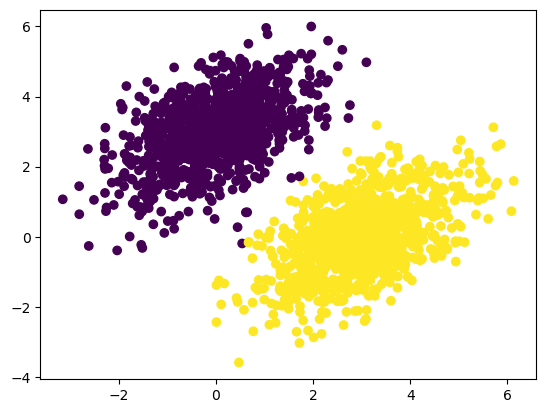

In [20]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

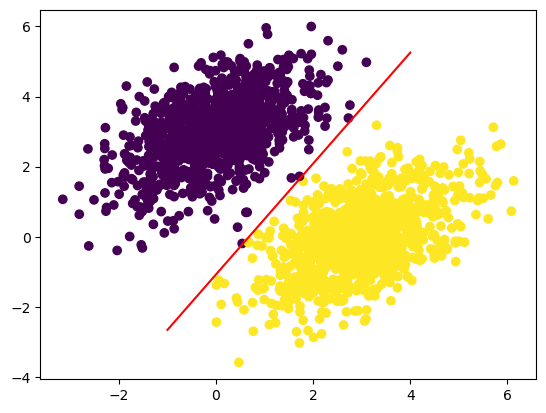

In [24]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)